In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Torch 
import torch
import torch.nn as nn
from torchmetrics import Accuracy
from torch.utils.data import Dataset, DataLoader

# Scikit-Learn
# Data Encoding and Scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Natural Language Processing(NLP)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Word Embedding
import gensim
from gensim.models import Word2Vec

In [2]:
nltk.download('punkt')      # For tokenization
nltk.download('stopwords')  # For stopword removal
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dushyant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dushyant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dushyant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [4]:
df = pd.read_csv('IntervieweeDataset.csv')

In [5]:
df.head(1)

,Name,Age,Gender,Type of Graduation/Post Graduation,Marital status,Mode of interview given by candidate?,Pre Interview Check,Fluency in English based on introduction,Confidence based on Introduction (English),Confidence based on the topic given,...,Structured Thinking Based on the PPT Question.1,Structured Thinking( Call pitch).1,Regional fluency based on the topic given .1,Regional fluency Based on the PPT Question.1,Regional fluency based on the sales scenario.1,Confidence Score,Structured Thinking Score,Regional Fluency Score,Total Score,Whether joined the company or not\n
0,parida,25,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,3,2,1,1.0,1.0,11,7,3,42,No


In [6]:
df.shape

(21256, 52)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(18681, 52)

In [9]:
df.drop(df.iloc[:,8:18], axis=1, inplace=True)

In [10]:
df.drop(['Does the candidate has mother tongue influence while speaking english.', 'How many slides candidate have submitted in PPT?'], axis=1, inplace=True)

In [11]:
df.shape

(18681, 40)

In [12]:
df.rename(columns={'Type of Graduation/Post Graduation':'Education', 'Mode of interview given by candidate?':'Mode of Interview', 'Has acquaintance in Company and has spoken to him/her before applying?':'Acquaintance and Referral'}, inplace=True)

In [13]:
df.rename(columns={'Whether joined the company or not\n': 'Whether joined the company or not', 'What was the type of Role?\t': 'What was the type of Role?'}, inplace=True)

In [14]:
df.rename(columns={"But, my child's exam are going on now, so we will keep the counselling session after the exams get over.(Time: Favourable pitch: Counsellor hype)":"But, my child's exam are going on now, so we will keep the counselling session after the exams get over"}, inplace=True)

In [15]:
df.columns

Index(['Name', 'Age', 'Gender', 'Education', 'Marital status',
       'Mode of Interview', 'Pre Interview Check',
       'Fluency in English based on introduction', 'Acquaintance and Referral',
       'Candidate Status', 'Last Fixed CTC (lakhs) ', 'Currently Employed',
       'Experienced candidate - (Experience in months)',
       'Experienced Candidate (Nature of work)', 'What was the type of Role?',
       'Call-pitch Elements used during the call Sales Scenario',
       'But, my child's exam are going on now, so we will keep the counselling session after the exams get over',
       'Let me discuss it with my child',
       'Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app.',
       'Role acceptance', 'Interview Verdict',
       'Candidate is willing to relocate',
       'Role Location to be given to the candidate', 'Comments',
       'RedFlags Comments in Interview',
       'Confidence based on Introduction (Engl

In [16]:
df['Whether joined the company or not'].unique()

array(['No', 'Yes', 'Not Joined', 'Joined'], dtype=object)

In [17]:
df['Whether joined the company or not'] = df['Whether joined the company or not'].replace({'Joined':'Yes', 'Not Joined':'No'})

In [18]:
df['Whether joined the company or not'] = df['Whether joined the company or not'].map({'Yes': 1, 'No': 0}).astype(int)

In [19]:
df['Whether joined the company or not'].unique()

array([0, 1])

In [20]:
df['Age'].unique()

array(['25', '29', '27', '22', '23', '24', '26', '21', '30', '20', '31',
       '28', '32+', '32'], dtype=object)

In [21]:
df['Age'] = df['Age'].astype(str).str.replace('+', '', regex=False).astype(int)

In [22]:
df['Age'].unique()

array([25, 29, 27, 22, 23, 24, 26, 21, 30, 20, 31, 28, 32])

In [23]:
bins = [18, 22, 25, 28, 32, 35, float('inf')]
labels = ['18-22', '23-25', '26-28', '29-32', '33-35', '35+']

In [24]:
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [25]:
df['Age'].unique()

['23-25', '29-32', '26-28', '18-22']
Categories (6, object): ['18-22' < '23-25' < '26-28' < '29-32' < '33-35' < '35+']

In [26]:
df.columns

Index(['Name', 'Age', 'Gender', 'Education', 'Marital status',
       'Mode of Interview', 'Pre Interview Check',
       'Fluency in English based on introduction', 'Acquaintance and Referral',
       'Candidate Status', 'Last Fixed CTC (lakhs) ', 'Currently Employed',
       'Experienced candidate - (Experience in months)',
       'Experienced Candidate (Nature of work)', 'What was the type of Role?',
       'Call-pitch Elements used during the call Sales Scenario',
       'But, my child's exam are going on now, so we will keep the counselling session after the exams get over',
       'Let me discuss it with my child',
       'Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app.',
       'Role acceptance', 'Interview Verdict',
       'Candidate is willing to relocate',
       'Role Location to be given to the candidate', 'Comments',
       'RedFlags Comments in Interview',
       'Confidence based on Introduction (Engl

In [27]:
df.shape

(18681, 40)

In [28]:
df['id'] = df.index

In [29]:
df.head(2)

,Name,Age,Gender,Education,Marital status,Mode of Interview,Pre Interview Check,Fluency in English based on introduction,Acquaintance and Referral,Candidate Status,...,Structured Thinking( Call pitch).1,Regional fluency based on the topic given .1,Regional fluency Based on the PPT Question.1,Regional fluency based on the sales scenario.1,Confidence Score,Structured Thinking Score,Regional Fluency Score,Total Score,Whether joined the company or not,id
0,parida,23-25,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,No,Experienced in non client facing(equal to or m...,...,2,1,1.0,1.0,11,7,3,42,0,0
1,shreej,29-32,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,No,Lateral(2021 and before with (less than 6 mont...,...,3,3,3.0,3.0,12,9,9,60,0,1


# New Dataframe for only Numerical Operations (excluding Name column from it)

In [31]:
numerical_df = df.copy()
numerical_df.drop(['id',
                   'Name',
                   'Age',
                   'Gender',
                   'Currently Employed',
                   'Marital status',
                   'Mode of Interview',
                   'Pre Interview Check',
                   'Fluency in English based on introduction',
                   'Acquaintance and Referral',
                   'Candidate Status',
                   'Education',
                   'Last Fixed CTC (lakhs) ',
                   'Interview Verdict',
                   'Comments',
                   'RedFlags Comments in Interview',
                   'Call-pitch Elements used during the call Sales Scenario',
                   "But, my child's exam are going on now, so we will keep the counselling session after the exams get over",
                  'Let me discuss it with my child',
                   'Whether joined the company or not',
                   "Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app.",'Role Location to be given to the candidate'],
                  axis=1,inplace=True)

# Data Scaling
The StandardScaler from sklearn.preprocessing transforms data to have:

Mean = 0 ,
Standard Deviation = 1

In [33]:
scaler = StandardScaler()
scaler

StandardScaler()

In [34]:
temp_list = ['Confidence based on Introduction (English).1',
       'Confidence based on the topic given  .1',
       'Confidence Based on the PPT Question.1',
       'Confidence based on the sales scenario.1',
       'Structured Thinking (In regional only).1',
       'Structured Thinking Based on the PPT Question.1',
       'Structured Thinking( Call pitch).1',
       'Regional fluency based on the topic given  .1',
       'Regional fluency Based on the PPT Question.1',
       'Regional fluency based on the  sales scenario.1', 'Confidence Score',
       'Structured Thinking Score', 'Regional Fluency Score', 'Total Score']

In [35]:
numerical_df[temp_list] = scaler.fit_transform(numerical_df[temp_list])
print("Means after scaling:\n", numerical_df[temp_list].mean().round(5))
print("Standard deviations after scaling:\n", numerical_df[temp_list].std().round(5))

Means after scaling:
 Confidence based on Introduction (English).1      -0.0
Confidence based on the topic given  .1           -0.0
Confidence Based on the PPT Question.1            -0.0
Confidence based on the sales scenario.1          -0.0
Structured Thinking (In regional only).1           0.0
Structured Thinking Based on the PPT Question.1   -0.0
Structured Thinking( Call pitch).1                -0.0
Regional fluency based on the topic given  .1      0.0
Regional fluency Based on the PPT Question.1      -0.0
Regional fluency based on the  sales scenario.1   -0.0
Confidence Score                                   0.0
Structured Thinking Score                         -0.0
Regional Fluency Score                             0.0
Total Score                                        0.0
dtype: float64
Standard deviations after scaling:
 Confidence based on Introduction (English).1       1.00003
Confidence based on the topic given  .1            1.00003
Confidence Based on the PPT Question.1 

In [36]:
numerical_df.head()

,Experienced candidate - (Experience in months),Experienced Candidate (Nature of work),What was the type of Role?,Role acceptance,Candidate is willing to relocate,Confidence based on Introduction (English).1,Confidence based on the topic given .1,Confidence Based on the PPT Question.1,Confidence based on the sales scenario.1,Structured Thinking (In regional only).1,Structured Thinking Based on the PPT Question.1,Structured Thinking( Call pitch).1,Regional fluency based on the topic given .1,Regional fluency Based on the PPT Question.1,Regional fluency based on the sales scenario.1,Confidence Score,Structured Thinking Score,Regional Fluency Score,Total Score
0,6-11.99 Months,tech,Fresher,Yes : Think and says yes.(Shows some hesitation),Yes - Anywhere Within a City,1.196219,-0.432008,1.136634,1.164132,-0.618598,1.020654,-0.424411,-1.092966,-1.063625,-1.043289,0.951490,-0.022276,-1.320677,-0.198863
1,Fresher(<6 months),Fresher(<6 months),Fresher,Emphatic Yes,Yes - Anywhere in PAN India,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342
2,Fresher(<6 months),Fresher(<6 months),Individual Contributor,Emphatic Yes,Yes - Anywhere Within a City,-0.390782,1.126275,-0.371960,1.164132,0.985514,1.020654,1.006713,0.979581,-1.063625,1.060405,0.487893,1.256178,0.402709,0.750139
3,Fresher(<6 months),Fresher(<6 months),Fresher,Emphatic Yes,Yes - Anywhere in PAN India,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342
4,Fresher(<6 months),Fresher(<6 months),Fresher,Yes : Think and says yes.(Shows some hesitation),No - Want Specific Centre Location Only,-0.390782,1.126275,-0.371960,1.164132,-0.618598,-0.556030,-1.855535,0.979581,-1.063625,1.060405,0.487893,-1.300729,0.402709,-0.009063


In [37]:
numerical_df.shape

(18681, 19)

# Data Encoding

In [39]:
numerical_df['Role acceptance'].value_counts()

Role acceptance
Emphatic Yes                                        12456
Yes : Think and says yes.(Shows some hesitation)     5475
No                                                    750
Name: count, dtype: int64

In [40]:
# transformer = ColumnTransformer(transformers = [
#     ('t1', OneHotEncoder(sparse_output=False, drop='first'), ['Gender', 'Experienced Candidate (Nature of work)', 'What was the type of Role?', 'Currently Employed', 'Marital status', 'Mode of Interview', 'Pre Interview Check', 'Fluency in English based on introduction', 'Acquaintance and Referral', 'Candidate Status', 'Education']),
#     ('t2', OrdinalEncoder(categories=[['Fresher','0-1.99','2-2.99','3-3.99','4-4.99','5-5.99','6-6.99','7+']]), ['Last Fixed CTC (lakhs) ']),
#     ('t3', OrdinalEncoder(categories=[['No - Want Specific Centre Location Only','Yes - Anywhere Within a City','Yes - Anywhere Within a State','Yes - Anywhere in PAN India']]), ['Candidate is willing to relocate']),
#     ('t4', OrdinalEncoder(categories=[['Reject','Borderline Reject','Borderline Select','Select','Premium Select']]), ['Interview Verdict']),
#     ('t5', OrdinalEncoder(categories=[['No','Yes : Think and says yes.(Shows some hesitation)','Emphatic Yes']]), ['Role acceptance']),
#     ('t6', OrdinalEncoder(categories=[['Fresher(<6 months)','6-11.99 Months','12-17.99 Months','18-23.99 Months','24-29.99 Months','30-35.99 Months','36-47.99 Months','48+ Months']]), ['Experienced candidate - (Experience in months)']),
#     ('t7', OrdinalEncoder(categories=[['18-22', '23-25', '26-28', '29-32', '33-35', '35+']]), ['Age'])
# ], remainder='passthrough')

In [41]:
transformer = ColumnTransformer(transformers = [
    ('t1', OneHotEncoder(sparse_output=False, drop='first'), ['Experienced Candidate (Nature of work)', 'What was the type of Role?']),
    ('t2', OrdinalEncoder(categories=[['No - Want Specific Centre Location Only','Yes - Anywhere Within a City','Yes - Anywhere Within a State','Yes - Anywhere in PAN India']]), ['Candidate is willing to relocate']),
    ('t3', OrdinalEncoder(categories=[['No','Yes : Think and says yes.(Shows some hesitation)','Emphatic Yes']]), ['Role acceptance']),
    ('t4', OrdinalEncoder(categories=[['Fresher(<6 months)','6-11.99 Months','12-17.99 Months','18-23.99 Months','24-29.99 Months','30-35.99 Months','36-47.99 Months','48+ Months']]), ['Experienced candidate - (Experience in months)'])
], remainder='passthrough')

In [42]:
numerical_df = transformer.fit_transform(numerical_df)

In [43]:
type(numerical_df)

numpy.ndarray

In [44]:
features_names = transformer.get_feature_names_out()
numerical_df = pd.DataFrame(numerical_df, columns=features_names)

In [45]:
numerical_df.shape

(18681, 1657)

In [46]:
numerical_df.head(2)

,t1__Experienced Candidate (Nature of work)_ DISPATCHER IN US COMPANY,t1__Experienced Candidate (Nature of work)_ Laboratory Attendant,t1__Experienced Candidate (Nature of work)_ Network Engineer,t1__Experienced Candidate (Nature of work)_ no,t1__Experienced Candidate (Nature of work)_ proctor,t1__Experienced Candidate (Nature of work)_-,t1__Experienced Candidate (Nature of work)_.,t1__Experienced Candidate (Nature of work)_/,t1__Experienced Candidate (Nature of work)_10 lakhs lone,t1__Experienced Candidate (Nature of work)_200 cases per day,...,remainder__Structured Thinking (In regional only).1,remainder__Structured Thinking Based on the PPT Question.1,remainder__Structured Thinking( Call pitch).1,remainder__Regional fluency based on the topic given .1,remainder__Regional fluency Based on the PPT Question.1,remainder__Regional fluency based on the sales scenario.1,remainder__Confidence Score,remainder__Structured Thinking Score,remainder__Regional Fluency Score,remainder__Total Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.618598,1.020654,-0.424411,-1.092966,-1.063625,-1.043289,0.951490,-0.022276,-1.320677,-0.198863
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342


# Principal Component Analysis(PCA) for Dimensionality Reduction
**Required to reduce the number of features**

In [48]:
pca = PCA(n_components=0.95)
numerical_pca = pca.fit_transform(numerical_df)

In [49]:
type(numerical_pca)

numpy.ndarray

In [50]:
features_names = pca.get_feature_names_out()
numerical_df = pd.DataFrame(numerical_pca, columns=features_names)

In [51]:
type(numerical_df)

pandas.core.frame.DataFrame

In [52]:
numerical_df.shape

(18681, 11)

In [53]:
numerical_df.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-0.197008,-0.232519,-2.383178,-0.046979,1.103026,-1.623935,1.090490,-0.370595,-0.155165,-0.846527,0.137569
1,4.027453,-2.288778,0.381735,1.113706,0.186264,-0.171077,-0.173169,0.195735,0.110573,0.034449,-0.011280
2,1.960428,-1.609667,-0.821711,-0.391334,-0.669170,0.722258,-1.769774,-0.869505,-0.013070,-1.051385,0.076931
3,4.027453,-2.288778,0.381735,1.113706,0.186264,-0.171077,-0.173169,0.195735,0.110573,0.034449,-0.011280
4,-0.550025,-1.180942,1.079436,-2.095423,1.809925,-0.194974,-0.947364,-1.923605,-0.521217,-1.047965,-0.206589


In [54]:
# df = df[['id',
#                    'Name',
#                    'Comments',
#                    'RedFlags Comments in Interview',
#                    'Call-pitch Elements used during the call Sales Scenario',
#                    "But, my child's exam are going on now, so we will keep the counselling session after the exams get over",
#                   'Let me discuss it with my child',
#                 'Whether joined the company or not',
#                    "Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app.",'Role Location to be given to the candidate']]

In [55]:
df = df[['id',
                   'Name',
                   'Age',
                   'Gender',
                   'Currently Employed',
                   'Marital status',
                   'Mode of Interview',
                   'Pre Interview Check',
                   'Fluency in English based on introduction',
                   'Acquaintance and Referral',
                   'Candidate Status',
                   'Education',
                   'Last Fixed CTC (lakhs) ',
                   'Interview Verdict',
                   'Call-pitch Elements used during the call Sales Scenario',
                   "But, my child's exam are going on now, so we will keep the counselling session after the exams get over",
                  'Let me discuss it with my child',
                   'Whether joined the company or not',
                   "Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app.",'Role Location to be given to the candidate']]

In [56]:
df['Whether joined the company or not'].unique()

array([0, 1])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18681 entries, 0 to 21255
Data columns (total 20 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype   
---  ------                                                                                                                   --------------  -----   
 0   id                                                                                                                       18681 non-null  int64   
 1   Name                                                                                                                     18681 non-null  object  
 2   Age                                                                                                                      18681 non-null  category
 3   Gender                                                                                                                   18681 non-null 

In [58]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x:x.split())

In [59]:
df.head()

,id,Name,Age,Gender,Currently Employed,Marital status,Mode of Interview,Pre Interview Check,Fluency in English based on introduction,Acquaintance and Referral,Candidate Status,Education,Last Fixed CTC (lakhs),Interview Verdict,Call-pitch Elements used during the call Sales Scenario,"But, my child's exam are going on now, so we will keep the counselling session after the exams get over",Let me discuss it with my child,Whether joined the company or not,Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app.,Role Location to be given to the candidate
0,0,[parida],23-25,[Female],[No],[Unmarried],[Mobile],"[Proceed, with, the, Interview]","[Able, to, speak, sentences, in, a, clear/cohe...",[No],"[Experienced, in, non, client, facing(equal, t...","[Masters, in, data, science]",[5-5.99],[Reject],"[Purpose, of, Call, (Book, a, Counselling, Ses...","[Urgency, using, Time]","[None, of, the, above]",0,"[None, of, the, above]",[Bangalore]
1,1,[shreej],29-32,[Female],[No],[Unmarried],[Mobile],"[Proceed, with, the, Interview]","[Able, to, speak, sentences, in, a, clear/cohe...",[No],"[Lateral(2021, and, before, with, (less, than,...","[BSc, or, MSc]",[Fresher],[Reject],"[Introduction, (Self, Intro,Company, Name),, P...","[Asking, Questions]","[None, of, the, above]",0,"[Non, chargeable, session]",[Delhi]
2,2,[ms6744],26-28,[Female],[Yes],[Unmarried],[Mobile],"[Proceed, with, the, Interview]","[Able, to, speak, sentences, in, a, clear/cohe...",[Yes],"[Fresher(only, 2022, grad)]","[B.E, /, B-Tech]",[Fresher],"[Premium, Select]","[Introduction, (Self, Intro,Company, Name)]","[Urgency, using, Time]","[Decision, Making:, Major, decision, of, child...",1,"[Non, chargeable, session]",[Chennai]
3,3,[aswalu],18-22,[Male],[No],[Unmarried],[Laptop],"[Proceed, with, the, Interview]","[Able, to, speak, sentences, in, a, clear/cohe...",[No],"[Fresher(only, 2022, grad)]","[B.E, /, B-Tech]",[Fresher],"[Premium, Select]","[Introduction, (Self, Intro,Company, Name),, P...","[Urgency, using, Time,, Urgency, using, situat...","[None, of, the, above]",1,"[Value, creation(Nothing, comes, for, free)]",[Delhi]
4,4,[aniket],18-22,[Male],[No],[Unmarried],[Mobile],"[Proceed, with, the, Interview]","[Taking, gaps, while, speaking, due, to, lack,...",[No],"[Fresher(only, 2022, grad)]",[BA/MA],[Fresher],"[Borderline, Select]","[None, of, the, Above]","[Urgency, by, creating, counsellor, Hype]","[Anticipation, of, objection, from, child's, e...",0,"[Value, creation(Nothing, comes, for, free)]",[Bangalore]


In [60]:
df.columns

Index(['id', 'Name', 'Age', 'Gender', 'Currently Employed', 'Marital status',
       'Mode of Interview', 'Pre Interview Check',
       'Fluency in English based on introduction', 'Acquaintance and Referral',
       'Candidate Status', 'Education', 'Last Fixed CTC (lakhs) ',
       'Interview Verdict',
       'Call-pitch Elements used during the call Sales Scenario',
       'But, my child's exam are going on now, so we will keep the counselling session after the exams get over',
       'Let me discuss it with my child', 'Whether joined the company or not',
       'Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app.',
       'Role Location to be given to the candidate'],
      dtype='object')

In [61]:
# df['tags'] = df['Name'] + df['Comments'] + df['RedFlags Comments in Interview'] + df['Call-pitch Elements used during the call Sales Scenario'] + df["But, my child's exam are going on now, so we will keep the counselling session after the exams get over"] + df['Let me discuss it with my child'] + df["Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app."] + df['Role Location to be given to the candidate']

In [62]:
df['tags'] = (
    df['Name'].astype(str) + " " +
    df['Age'].astype(str) + " " +
    df['Gender'].astype(str) + " " +
    df['Currently Employed'].astype(str) + " " +
    df['Marital status'].astype(str) + " " +
    df['Mode of Interview'].astype(str) + " " +
    df['Pre Interview Check'].astype(str) + " " +
    df['Fluency in English based on introduction'].astype(str) + " " +
    df['Acquaintance and Referral'].astype(str) + " " +
    df['Candidate Status'].astype(str) + " " +
    df['Education'].astype(str) + " " +
    df['Last Fixed CTC (lakhs) '].astype(str) + " " +
    df['Interview Verdict'].astype(str) + " " +
    df['Call-pitch Elements used during the call Sales Scenario'].astype(str) + " " +
    df["But, my child's exam are going on now, so we will keep the counselling session after the exams get over"].astype(str) + " " +
    df['Let me discuss it with my child'].astype(str) + " " +
    df["Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app."].astype(str) + " " +
    df['Role Location to be given to the candidate'].astype(str)
)

In [63]:
df.head()

,id,Name,Age,Gender,Currently Employed,Marital status,Mode of Interview,Pre Interview Check,Fluency in English based on introduction,Acquaintance and Referral,...,Education,Last Fixed CTC (lakhs),Interview Verdict,Call-pitch Elements used during the call Sales Scenario,"But, my child's exam are going on now, so we will keep the counselling session after the exams get over",Let me discuss it with my child,Whether joined the company or not,Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app.,Role Location to be given to the candidate,tags
0,0,[parida],23-25,[Female],[No],[Unmarried],[Mobile],"[Proceed, with, the, Interview]","[Able, to, speak, sentences, in, a, clear/cohe...",[No],...,"[Masters, in, data, science]",[5-5.99],[Reject],"[Purpose, of, Call, (Book, a, Counselling, Ses...","[Urgency, using, Time]","[None, of, the, above]",0,"[None, of, the, above]",[Bangalore],['parida'] 23-25 ['Female'] ['No'] ['Unmarried...
1,1,[shreej],29-32,[Female],[No],[Unmarried],[Mobile],"[Proceed, with, the, Interview]","[Able, to, speak, sentences, in, a, clear/cohe...",[No],...,"[BSc, or, MSc]",[Fresher],[Reject],"[Introduction, (Self, Intro,Company, Name),, P...","[Asking, Questions]","[None, of, the, above]",0,"[Non, chargeable, session]",[Delhi],['shreej'] 29-32 ['Female'] ['No'] ['Unmarried...
2,2,[ms6744],26-28,[Female],[Yes],[Unmarried],[Mobile],"[Proceed, with, the, Interview]","[Able, to, speak, sentences, in, a, clear/cohe...",[Yes],...,"[B.E, /, B-Tech]",[Fresher],"[Premium, Select]","[Introduction, (Self, Intro,Company, Name)]","[Urgency, using, Time]","[Decision, Making:, Major, decision, of, child...",1,"[Non, chargeable, session]",[Chennai],['ms6744'] 26-28 ['Female'] ['Yes'] ['Unmarrie...
3,3,[aswalu],18-22,[Male],[No],[Unmarried],[Laptop],"[Proceed, with, the, Interview]","[Able, to, speak, sentences, in, a, clear/cohe...",[No],...,"[B.E, /, B-Tech]",[Fresher],"[Premium, Select]","[Introduction, (Self, Intro,Company, Name),, P...","[Urgency, using, Time,, Urgency, using, situat...","[None, of, the, above]",1,"[Value, creation(Nothing, comes, for, free)]",[Delhi],['aswalu'] 18-22 ['Male'] ['No'] ['Unmarried']...
4,4,[aniket],18-22,[Male],[No],[Unmarried],[Mobile],"[Proceed, with, the, Interview]","[Taking, gaps, while, speaking, due, to, lack,...",[No],...,[BA/MA],[Fresher],"[Borderline, Select]","[None, of, the, Above]","[Urgency, by, creating, counsellor, Hype]","[Anticipation, of, objection, from, child's, e...",0,"[Value, creation(Nothing, comes, for, free)]",[Bangalore],['aniket'] 18-22 ['Male'] ['No'] ['Unmarried']...


In [64]:
df.loc[1,'tags']

"['shreej'] 29-32 ['Female'] ['No'] ['Unmarried'] ['Mobile'] ['Proceed', 'with', 'the', 'Interview'] ['Able', 'to', 'speak', 'sentences', 'in', 'a', 'clear/coherent', 'way.', 'Smooth', 'talker', 'with', 'one', 'or', 'two', 'hiccups.'] ['No'] ['Lateral(2021', 'and', 'before', 'with', '(less', 'than', '6', 'months)', 'experience)'] ['BSc', 'or', 'MSc'] ['Fresher'] ['Reject'] ['Introduction', '(Self', 'Intro,Company', 'Name),', 'Purpose', 'of', 'Call', '(Book', 'a', 'Counselling', 'Session),', 'Need', 'Generation', '-', 'By', 'Asking', 'ques', 'like', 'student', 'class,', 'performance', 'etc..'] ['Asking', 'Questions'] ['None', 'of', 'the', 'above'] ['Non', 'chargeable', 'session'] ['Delhi']"

In [65]:
df = df[['id','Name','tags','Whether joined the company or not']]

In [66]:
df.head(2)

,id,Name,tags,Whether joined the company or not
0,0,[parida],['parida'] 23-25 ['Female'] ['No'] ['Unmarried...,0
1,1,[shreej],['shreej'] 29-32 ['Female'] ['No'] ['Unmarried...,0


## Stemming
**Note: Use Lemmatization for more accuracy**

To normalize words and reduce them to their root forms, we will apply **stemming**. This helps in handling variations of words and improves text processing efficiency for machine learning models.  
(e.g., "running" → "run")

**Currently using Lemmatization**

In [69]:
lemmatizer = WordNetLemmatizer()

In [70]:
stop_words = set(stopwords.words('english'))

In [71]:
df.head()

,id,Name,tags,Whether joined the company or not
0,0,[parida],['parida'] 23-25 ['Female'] ['No'] ['Unmarried...,0
1,1,[shreej],['shreej'] 29-32 ['Female'] ['No'] ['Unmarried...,0
2,2,[ms6744],['ms6744'] 26-28 ['Female'] ['Yes'] ['Unmarrie...,1
3,3,[aswalu],['aswalu'] 18-22 ['Male'] ['No'] ['Unmarried']...,1
4,4,[aniket],['aniket'] 18-22 ['Male'] ['No'] ['Unmarried']...,0


In [72]:
def formatting(text):
    if isinstance(text, list):  
        text = " ".join(text)
    words = word_tokenize(text.lower())
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(filtered_words)

In [73]:
''' Applying Stopwords Removal and Lemmatization'''

df['tags'] = df['tags'].apply(formatting)

In [74]:
df.head(2)

,id,Name,tags,Whether joined the company or not
0,0,[parida],[ 'parida ' ] 23-25 [ 'female ' ] [ 'no ' ] [ ...,0
1,1,[shreej],[ 'shreej ' ] 29-32 [ 'female ' ] [ 'no ' ] [ ...,0


In [75]:
df.loc[1,'tags']

"[ 'shreej ' ] 29-32 [ 'female ' ] [ 'no ' ] [ 'unmarried ' ] [ 'mobile ' ] [ 'proceed ' , 'with ' , 'the ' , 'interview ' ] [ 'able ' , 'to ' , 'speak ' , 'sentences ' , 'in ' , ' ' , 'clear/coherent ' , 'way . ' , 'smooth ' , 'talker ' , 'with ' , 'one ' , 'or ' , 'two ' , 'hiccups . ' ] [ 'no ' ] [ 'lateral ( 2021 ' , 'and ' , 'before ' , 'with ' , ' ( less ' , 'than ' , ' 6 ' , 'months ) ' , 'experience ) ' ] [ 'bsc ' , 'or ' , 'msc ' ] [ 'fresher ' ] [ 'reject ' ] [ 'introduction ' , ' ( self ' , 'intro , company ' , 'name ) , ' , 'purpose ' , 'of ' , 'call ' , ' ( book ' , ' ' , 'counselling ' , 'session ) , ' , 'need ' , 'generation ' , '- ' , 'by ' , 'asking ' , 'ques ' , 'like ' , 'student ' , 'class , ' , 'performance ' , 'etc .. ' ] [ 'asking ' , 'questions ' ] [ 'none ' , 'of ' , 'the ' , 'above ' ] [ 'non ' , 'chargeable ' , 'session ' ] [ 'delhi ' ]"

In [76]:
def remove_duplicates(text):
    words = text.split()
    seen = set()
    unique_words = []

    for word in words:
        if word not in seen:
            seen.add(word)
            unique_words.append(word)

    return " ".join(unique_words)        

In [77]:
df['tags'] = df['tags'].apply(remove_duplicates)

In [78]:
df['tags'] = df['tags'].str.replace('/', '', regex=False)

In [79]:
df['tags'] = df['tags'].str.replace('[','', regex=False)
df['tags'] = df['tags'].str.replace(']','', regex=False)

In [80]:
df.loc[1,'tags']

" 'shreej '  29-32 'female 'no 'unmarried 'mobile 'proceed , 'with 'the 'interview 'able 'to 'speak 'sentences 'in 'clearcoherent 'way . 'smooth 'talker 'one 'or 'two 'hiccups 'lateral ( 2021 'and 'before less 'than 6 'months ) 'experience 'bsc 'msc 'fresher 'reject 'introduction self 'intro company 'name 'purpose 'of 'call book 'counselling 'session 'need 'generation '- 'by 'asking 'ques 'like 'student 'class 'performance 'etc .. 'questions 'none 'above 'non 'chargeable 'delhi"

In [81]:
df = df.join(numerical_df, how='inner')

In [82]:
df.shape

(16386, 15)

In [83]:
df.head(5)

,id,Name,tags,Whether joined the company or not,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,0,[parida],'parida ' 23-25 'female 'no 'unmarried 'mobi...,0,-0.197008,-0.232519,-2.383178,-0.046979,1.103026,-1.623935,1.090490,-0.370595,-0.155165,-0.846527,0.137569
1,1,[shreej],'shreej ' 29-32 'female 'no 'unmarried 'mobi...,0,4.027453,-2.288778,0.381735,1.113706,0.186264,-0.171077,-0.173169,0.195735,0.110573,0.034449,-0.011280
2,2,[ms6744],'ms6744 ' 26-28 'female 'yes 'unmarried 'mob...,1,1.960428,-1.609667,-0.821711,-0.391334,-0.669170,0.722258,-1.769774,-0.869505,-0.013070,-1.051385,0.076931
3,3,[aswalu],'aswalu ' 18-22 'male 'no 'unmarried 'laptop...,1,4.027453,-2.288778,0.381735,1.113706,0.186264,-0.171077,-0.173169,0.195735,0.110573,0.034449,-0.011280
4,4,[aniket],'aniket ' 18-22 'male 'no 'unmarried 'mobile...,0,-0.550025,-1.180942,1.079436,-2.095423,1.809925,-0.194974,-0.947364,-1.923605,-0.521217,-1.047965,-0.206589


In [84]:
df.loc[1,'tags']

" 'shreej '  29-32 'female 'no 'unmarried 'mobile 'proceed , 'with 'the 'interview 'able 'to 'speak 'sentences 'in 'clearcoherent 'way . 'smooth 'talker 'one 'or 'two 'hiccups 'lateral ( 2021 'and 'before less 'than 6 'months ) 'experience 'bsc 'msc 'fresher 'reject 'introduction self 'intro company 'name 'purpose 'of 'call book 'counselling 'session 'need 'generation '- 'by 'asking 'ques 'like 'student 'class 'performance 'etc .. 'questions 'none 'above 'non 'chargeable 'delhi"

## Word Embeddings
**Note: Use Contextual Embeddings for More Accuracy**

To represent words in a numerical format while preserving their meaning and relationships, we will apply **word embeddings**. This helps in capturing semantic similarities and improving machine learning model performance.
(e.g., "king" → similar to "queen" but different from "apple").

In [86]:
sentences = [tag.split() for tag in df['tags']]

In [87]:
# # Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=16, window=5, min_count=1, workers=4)

In [88]:
# Function to convert text into an average word embedding
def text_to_embedding(text):
    words = text.split()
    embeddings = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(16)

In [89]:
text_embeddings = np.array([text_to_embedding(text) for text in df['tags']])
text_embeddings_df = pd.DataFrame(text_embeddings, columns=[f'emb_{i}' for i in range(16)])

In [90]:
experimental_df = df.copy()
experimental_df.drop('Name', axis=1, inplace=True)

In [91]:
# Ensure target is binary
experimental_df['Whether joined the company or not'] = (experimental_df['Whether joined the company or not'] >= 0.5).astype(int)

In [92]:
experimental_df = experimental_df.join(text_embeddings_df, how='inner')

In [93]:
experimental_df.head(2)

,id,tags,Whether joined the company or not,pca0,pca1,pca2,pca3,pca4,pca5,pca6,...,emb_6,emb_7,emb_8,emb_9,emb_10,emb_11,emb_12,emb_13,emb_14,emb_15
0,0,'parida ' 23-25 'female 'no 'unmarried 'mobi...,0,-0.197008,-0.232519,-2.383178,-0.046979,1.103026,-1.623935,1.090490,...,-1.291593,2.223272,0.732897,-0.040572,0.596580,0.413263,-0.18292,-0.114591,-0.131192,-0.842117
1,1,'shreej ' 29-32 'female 'no 'unmarried 'mobi...,0,4.027453,-2.288778,0.381735,1.113706,0.186264,-0.171077,-0.173169,...,-0.721974,1.680629,-0.695753,0.307282,0.385257,0.529056,1.01163,0.406681,-1.377337,0.427075


In [94]:
experimental_df.columns

Index(['id', 'tags', 'Whether joined the company or not', 'pca0', 'pca1',
       'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10',
       'emb_0', 'emb_1', 'emb_2', 'emb_3', 'emb_4', 'emb_5', 'emb_6', 'emb_7',
       'emb_8', 'emb_9', 'emb_10', 'emb_11', 'emb_12', 'emb_13', 'emb_14',
       'emb_15'],
      dtype='object')

In [95]:
experimental_df.shape

(14373, 30)

In [96]:
''' Removing Tags after Word Embedding '''
experimental_df.drop('tags', axis=1, inplace=True)

In [97]:
y = experimental_df['Whether joined the company or not']
X = experimental_df
X.drop('Whether joined the company or not', axis=1, inplace=True)

## Data Splitting

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
print(f'Length of X_train: {len(X_train)}')
print(f'Length of X_test: {len(X_test)}')
print(f'Length of y_train: {len(y_train)}')
print(f'Length of y_test: {len(y_test)}')

Length of X_train: 11498
Length of X_test: 2875
Length of y_train: 11498
Length of y_test: 2875


In [101]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

## Dataset

In [103]:
class CandidateDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [104]:
train_data = CandidateDataset(X_train, y_train)
test_data = CandidateDataset(X_test, y_test)

In [105]:
X_train.shape[1]

28

## DataLoader

In [107]:
BATCH_SIZE = 16

In [108]:
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

In [109]:
len(train_data), len(test_data)

(11498, 2875)

In [110]:
len(train_dataloader), len(test_dataloader)

(719, 180)

## Define a Model

In [112]:
class HybridRecommender(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.LeakyReLU(),
            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

In [113]:
''' Initializing the model '''
input_size = X_train.shape[1]
model_0 = HybridRecommender(input_size)
model_0.to(device)

HybridRecommender(
  (network): Sequential(
    (0): Linear(in_features=28, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=64, out_features=32, bias=True)
    (13): LeakyReLU(negative_slope=0.01)
    (14): Linear(in_features=32, out_features=1, bias=True)
    (15): Sigmoid()
  )
)

In [114]:
''' Important Parameters '''
learning_rate = 0.001
epochs = 10

In [115]:
''' Loss Function and Optimizer '''
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=learning_rate)

## Training Loop

In [117]:
def train_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_function:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              accuracy,
              device:torch.device):

    train_loss, train_acc = 0,0
    model.train()

    for features, labels in dataloader:
        X, y = features.to(device), labels.to(device)
        # Forward Pass
        # y_pred = model(X)
        y_logits = model(X).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))

        # Calculate Loss and Accuracy per batch
        # loss = loss_function(y_pred, y)
        loss = loss_function(y_logits, y)
        train_loss += loss.item()
        train_acc += accuracy(y, y_pred).item()*100

        # Set gradients to zero
        optimizer.zero_grad()

        # Back Propogation
        loss.backward()

        # Update the Parameters
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc

## Testing Loop

In [119]:
def test_step(model:torch.nn.Module,
             dataloader:torch.utils.data.DataLoader,
             loss_function:torch.nn.Module,
             accuracy,
             device:torch.device):

    test_loss, test_acc = 0,0

    model.eval()
    with torch.inference_mode():
        for features, labels in dataloader:
            X, y = features.to(device), labels.to(device)
            # Forward Pass
            # test_pred = model(X)
            test_logits = model(X).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))
            
            # Calculate Loss and Accuracy per batch
            loss = loss_function(test_logits, y)
            test_loss += loss.item()
            test_acc += accuracy(y, test_pred).item()*100

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

        return test_loss, test_acc

## Combining Training and Testing Loop into evaluate()

In [121]:
def evaluate(model:torch.nn.Module,
             train_dataloader:torch.utils.data.DataLoader,
             test_dataloader:torch.utils.data.DataLoader,
             loss_function:torch.nn.Module,
             optimizer:torch.optim.Optimizer,
             accuracy,
             device:torch.device,
             epochs:int = 5):

    model.to(device)
    # Create empty result dictionary
    results = {'train_loss':[],
              'train_acc':[],
              'test_loss':[],
              'test_acc':[]}

    # Loop through training and testing steps for the number of epochs
    for epoch in range(epochs):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_function=loss_function,
                                          optimizer=optimizer,
                                          accuracy=accuracy,
                                          device=device)
        
        test_loss, test_acc = test_step(model=model,
                                          dataloader=test_dataloader,
                                          loss_function=loss_function,
                                          accuracy=accuracy,
                                          device=device)

        print(f'Training Loss: {train_loss:.5f} | Training Accuracy: {train_acc:.2f}% | Testing Loss: {test_loss:.5f} | Testing Accuracy: {test_acc:.2f}%')      

        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

    return results

In [122]:
torch.manual_seed(42)
accuracy = Accuracy(task='binary').to(device)

model_0_results = evaluate(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_function=loss_function,
                        optimizer=optimizer,
                        accuracy=accuracy,
                        device=device,
                        epochs=epochs)

Training Loss: 0.69440 | Training Accuracy: 47.42% | Testing Loss: 0.69075 | Testing Accuracy: 45.98%
Training Loss: 0.69291 | Training Accuracy: 47.43% | Testing Loss: 0.69021 | Testing Accuracy: 45.97%
Training Loss: 0.69191 | Training Accuracy: 47.42% | Testing Loss: 0.68963 | Testing Accuracy: 45.97%
Training Loss: 0.69201 | Training Accuracy: 47.43% | Testing Loss: 0.69076 | Testing Accuracy: 46.00%
Training Loss: 0.69203 | Training Accuracy: 47.43% | Testing Loss: 0.68995 | Testing Accuracy: 45.97%
Training Loss: 0.69227 | Training Accuracy: 47.43% | Testing Loss: 0.69040 | Testing Accuracy: 45.93%
Training Loss: 0.69206 | Training Accuracy: 47.42% | Testing Loss: 0.69100 | Testing Accuracy: 45.98%
Training Loss: 0.69192 | Training Accuracy: 47.43% | Testing Loss: 0.69003 | Testing Accuracy: 46.00%
Training Loss: 0.69202 | Training Accuracy: 47.43% | Testing Loss: 0.68981 | Testing Accuracy: 46.01%
Training Loss: 0.69197 | Training Accuracy: 47.43% | Testing Loss: 0.69047 | Testi

## Loss and Accuracy Curves

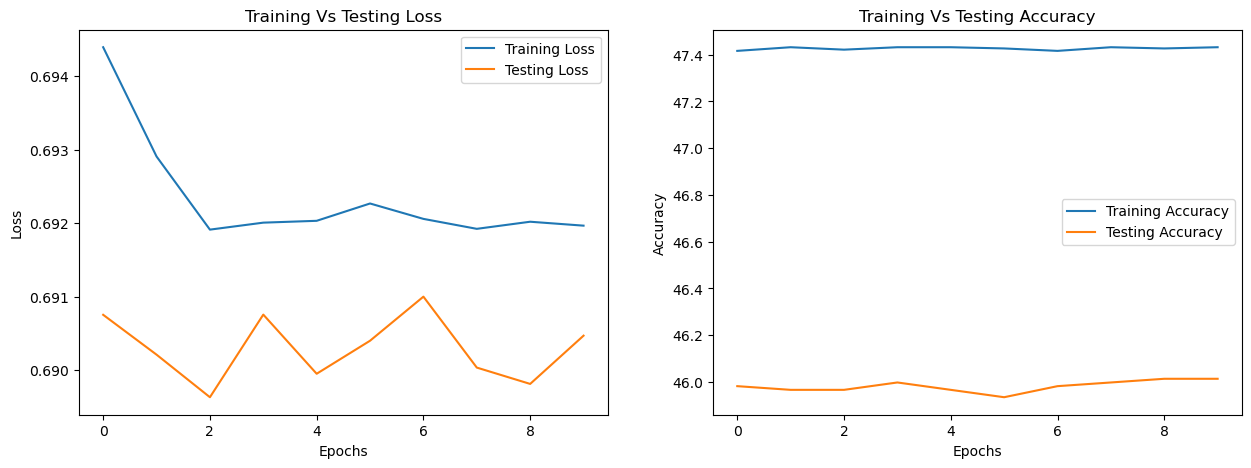

In [124]:
plt.figure(figsize=(15,5))
epochs = range(len(model_0_results['train_loss']))

plt.subplot(1,2,1)
plt.plot(epochs, model_0_results['train_loss'], label='Training Loss')
plt.plot(epochs, model_0_results['test_loss'], label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Vs Testing Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_0_results['train_acc'], label='Training Accuracy')
plt.plot(epochs, model_0_results['test_acc'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Vs Testing Accuracy')
plt.legend()

plt.show()